In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_file(filename):
    names, errors, shape, loss = [], [], [], []
    with open(filename, 'r') as file:
        for line in file:
            # Split the line into its components using whitespace as the delimiter
            parts = line.strip().split()
            # Extract the "name", "val1", and "val2" from the parts list
            names.append(parts[0])
            errors.append(float(parts[1]))
            shape.append(float(parts[2]))
            if len(parts) == 4:
                loss.append(float(parts[3]))
    return names, errors, shape, loss

def checkNumVar(codeNum, varNum):
    # varNum: 1-6, codeNum: 0-63
    for i in range(varNum):
        out = int(codeNum%2)
        codeNum = int(codeNum/2)
    return out


def getCodeNumsWithVars(vars, numTotVars=7):
    codeNums = []
    for i in range(2**numTotVars):
        lst = []
        for v in vars:
            lst.append(checkNumVar(i, v))
        if (all(num == 1 for num in lst)):
            codeNums.append(i)
    return codeNums


def getCodeNumsNumVars(numVars, numTotVars=7):
    codeNums = []
    for i in range(2**numTotVars):
        lst = []
        for v in range(1, numTotVars+1):
            lst.append(checkNumVar(i, v))
        if (sum(lst) == numVars):
            codeNums.append(i)
    return codeNums

def getVarsFromCode(code):
    vars = []
    count = 0
    while code > 0:
        count += 1
        if(code%2):
            vars.append(count)
        code = int(code/2)
    return vars

def colorScale(hexColor1, hexColor2, numColors=2):
    out = []
    hexColor1, hexColor2 = hexColor1.lstrip('#'), hexColor2.lstrip('#')
    r1, g1, b1 = int(hexColor1[0:2], 16), int(hexColor1[2:4], 16), int(hexColor1[4:6], 16)
    r2, g2, b2 = int(hexColor2[0:2], 16), int(hexColor2[2:4], 16), int(hexColor2[4:6], 16)
    slope_r, slope_g, slope_b = (r2-r1)/(numColors-1), (g2-g1)/(numColors-1), (b2-b1)/(numColors-1)
    for i in range(numColors):
        out.append("#" + "{:02x}".format(int(r1+i*slope_r)).upper() + "{:02x}".format(int(g1+i*slope_g)).upper() + "{:02x}".format(int(b1+i*slope_b)).upper())
    return out

def getInterval(errVal):
    spacing = 0.1
    for v in np.arange(3.5, 5.50001, spacing):
        if v >= errVal and v - spacing < errVal:
            return (v-spacing, v)

In [3]:
#subprocess.run("bash joinRMSfiles.sh", shell=True, capture_output=True, text=True)
forbidden = ["v2","v3","v8","v10","v11","v12","v13","v14","v15","v18","v25","v26","v27","v37","v38","v39","v52","v54",]
forbidden += ["v33", "v19", "v50", "v30", "v53", "v47", "v48", "v46"]
forbidden = []

arrs = read_file("eval_all_phi_loss.out")
errors_filt = [el for el, name in zip(arrs[1], arrs[0]) if not any(n in name.split("_") for n in forbidden)]
shapes_filt = [el for el, name in zip(arrs[2], arrs[0]) if not any(n in name.split("_") for n in forbidden)]
names_filt = [el for el, name in zip(arrs[0], arrs[0]) if not any(n in name.split("_") for n in forbidden)]
loss_filt = [el for el, name in zip(arrs[3], arrs[0]) if not any(n in name.split("_") for n in forbidden)]
print(len(arrs[0]), len(arrs), len(names_filt), len(arrs[3]))
reco_names, reco_errors, reco_shape, reco_loss = [], [], [], []
df_names, df_errors, df_shape, df_loss = [], [], [], []
df15_onevar_names, df15_onevar_errors, df15_onevar_shape, df15_onevar_loss = [], [], [], []
df15_twovar_names, df15_twovar_errors, df15_twovar_shape, df15_twovar_loss = [], [], [], []
df47_onevar_names, df47_onevar_errors, df47_onevar_shape, df47_onevar_loss = [], [], [], []
df47_twovar_names, df47_twovar_errors, df47_twovar_shape, df47_twovar_loss = [], [], [], []
df79_onevar_names, df79_onevar_errors, df79_onevar_shape, df79_onevar_loss = [], [], [], []
df79_twovar_names, df79_twovar_errors, df79_twovar_shape, df79_twovar_loss = [], [], [], []
df111_onevar_names, df111_onevar_errors, df111_onevar_shape, df111_onevar_loss = [], [], [], []
df111_twovar_names, df111_twovar_errors, df111_twovar_shape, df111_twovar_loss = [], [], [], []

df15_threevar_names, df15_threevar_errors, df15_threevar_shape, df15_threevar_loss = [], [], [], []
df47_threevar_names, df47_threevar_errors, df47_threevar_shape, df47_threevar_loss = [], [], [], []
#for n, e, s in zip(arrs[0], arrs[1], arrs[2]):
for i, zipped in enumerate(zip(names_filt, errors_filt, shapes_filt)):
    n, e, s = zipped
    l = loss_filt[i] if len(loss_filt) == len(shapes_filt) else 0
    if n == "RECO":
        reco_names.append(n)
        reco_errors.append(e)
        reco_shape.append(s)
        reco_loss.append(l)
    if len(n.split("_")) == 3 and n.split("_")[2] == "dl511": #0var
        df_names.append(n)
        df_errors.append(e)
        df_shape.append(s)
        df_loss.append(l)
    if len(n.split("_")) == 4 and n.split("_")[2] == "dl511": #1var
        if n.split("_")[1] == "df15":
            df15_onevar_names.append(n)
            df15_onevar_errors.append(e)
            df15_onevar_shape.append(s)
            df15_onevar_loss.append(l)
        elif n.split("_")[1] == "df47":
            df47_onevar_names.append(n)
            df47_onevar_errors.append(e)
            df47_onevar_shape.append(s)
            df47_onevar_loss.append(l)
        elif n.split("_")[1] == "df79":
            df79_onevar_names.append(n)
            df79_onevar_errors.append(e)
            df79_onevar_shape.append(s)
            df79_onevar_loss.append(l)
        elif n.split("_")[1] == "df111":
            df111_onevar_names.append(n)
            df111_onevar_errors.append(e)
            df111_onevar_shape.append(s)
            df111_onevar_loss.append(l)
    if len(n.split("_")) == 5 and n.split("_")[2] == "dl511": #2var
        if n.split("_")[1] == "df15":
            df15_twovar_names.append(n)
            df15_twovar_errors.append(e)
            df15_twovar_shape.append(s)
            df15_twovar_loss.append(l)
        elif n.split("_")[1] == "df47":
            df47_twovar_names.append(n)
            df47_twovar_errors.append(e)
            df47_twovar_shape.append(s)
            df47_twovar_loss.append(l)
        elif n.split("_")[1] == "df79":
            df79_twovar_names.append(n)
            df79_twovar_errors.append(e)
            df79_twovar_shape.append(s)
            df79_twovar_loss.append(l)
        elif n.split("_")[1] == "df111":
            df111_twovar_names.append(n)
            df111_twovar_errors.append(e)
            df111_twovar_shape.append(s)
            df111_twovar_loss.append(l)
    if len(n.split("_")) == 6 and n.split("_")[2] == "dl511": #3var
        if n.split("_")[1] == "df15":
            df15_threevar_names.append(n)
            df15_threevar_errors.append(e)
            df15_threevar_shape.append(s)
            df15_threevar_loss.append(l)
        if n.split("_")[1] == "df47":
            df47_threevar_names.append(n)
            df47_threevar_errors.append(e)
            df47_threevar_shape.append(s)
            df47_threevar_loss.append(l)
    
print("reco_errors", len(reco_errors))
print("df_errors", len(df_errors))
print("df15_onevar_errors", len(df15_onevar_errors))
print("df15_twovar_errors", len(df15_twovar_errors))
print("df47_onevar_errors", len(df47_onevar_errors))
print("df47_twovar_errors", len(df47_twovar_errors))
print("df79_onevar_errors", len(df79_onevar_errors))
print("df79_twovar_errors", len(df79_twovar_errors))
print("df111_onevar_errors", len(df111_onevar_errors))
print("df111_twovar_errors", len(df111_twovar_errors))
print("df15_threevar_errors", len(df15_threevar_errors))
print("df47_threevar_errors", len(df47_threevar_errors))

6289 4 6289 6289
reco_errors 1
df_errors 128
df15_onevar_errors 55
df15_twovar_errors 1485
df47_onevar_errors 55
df47_twovar_errors 1485
df79_onevar_errors 55
df79_twovar_errors 1485
df111_onevar_errors 55
df111_twovar_errors 1485
df15_threevar_errors 0
df47_threevar_errors 0


In [4]:
print(colorScale("#CC0000", "#000000", 5))

['#CC0000', '#990000', '#660000', '#330000', '#000000']


df111 [1, 2, 3, 4, 6, 7]
df15 [1, 2, 3, 4] 5.753381083633339 72.26239245858292
df47 [1, 2, 3, 4, 6]
df79 [1, 2, 3, 4, 7]
(4.900000000000002, 5.000000000000002) ('BDTG_df15_dl511_v22_v49', 4.990386854899953, 68.86425173251733)
(4.800000000000002, 4.900000000000001) ('BDTG_df15_dl511_v17_v24', 4.877601386858619, 68.45916497308279)
(4.100000000000001, 4.200000000000001) ('BDTG_df15_dl511_v22_v54', 4.196212419248909, 61.18013271377681)
(4.200000000000001, 4.300000000000001) ('BDTG_df15_dl511_v8_v22', 4.275499158421567, 62.4239910759715)
(4.400000000000001, 4.500000000000001) ('BDTG_df15_dl511_v15_v49', 4.476802087659107, 64.37447847660398)
(5.100000000000001, 5.200000000000001) ('BDTG_df15_dl511_v4_v40', 5.199376602392267, 70.68777815001121)
(4.500000000000002, 4.600000000000001) ('BDTG_df15_dl511_v32_v50', 4.595707981394512, 65.69173085172183)
(4.300000000000001, 4.4) ('BDTG_df15_dl511_v14_v22', 4.384563407122588, 63.24606847322245)
(4.600000000000001, 4.700000000000001) ('BDTG_df15_dl511

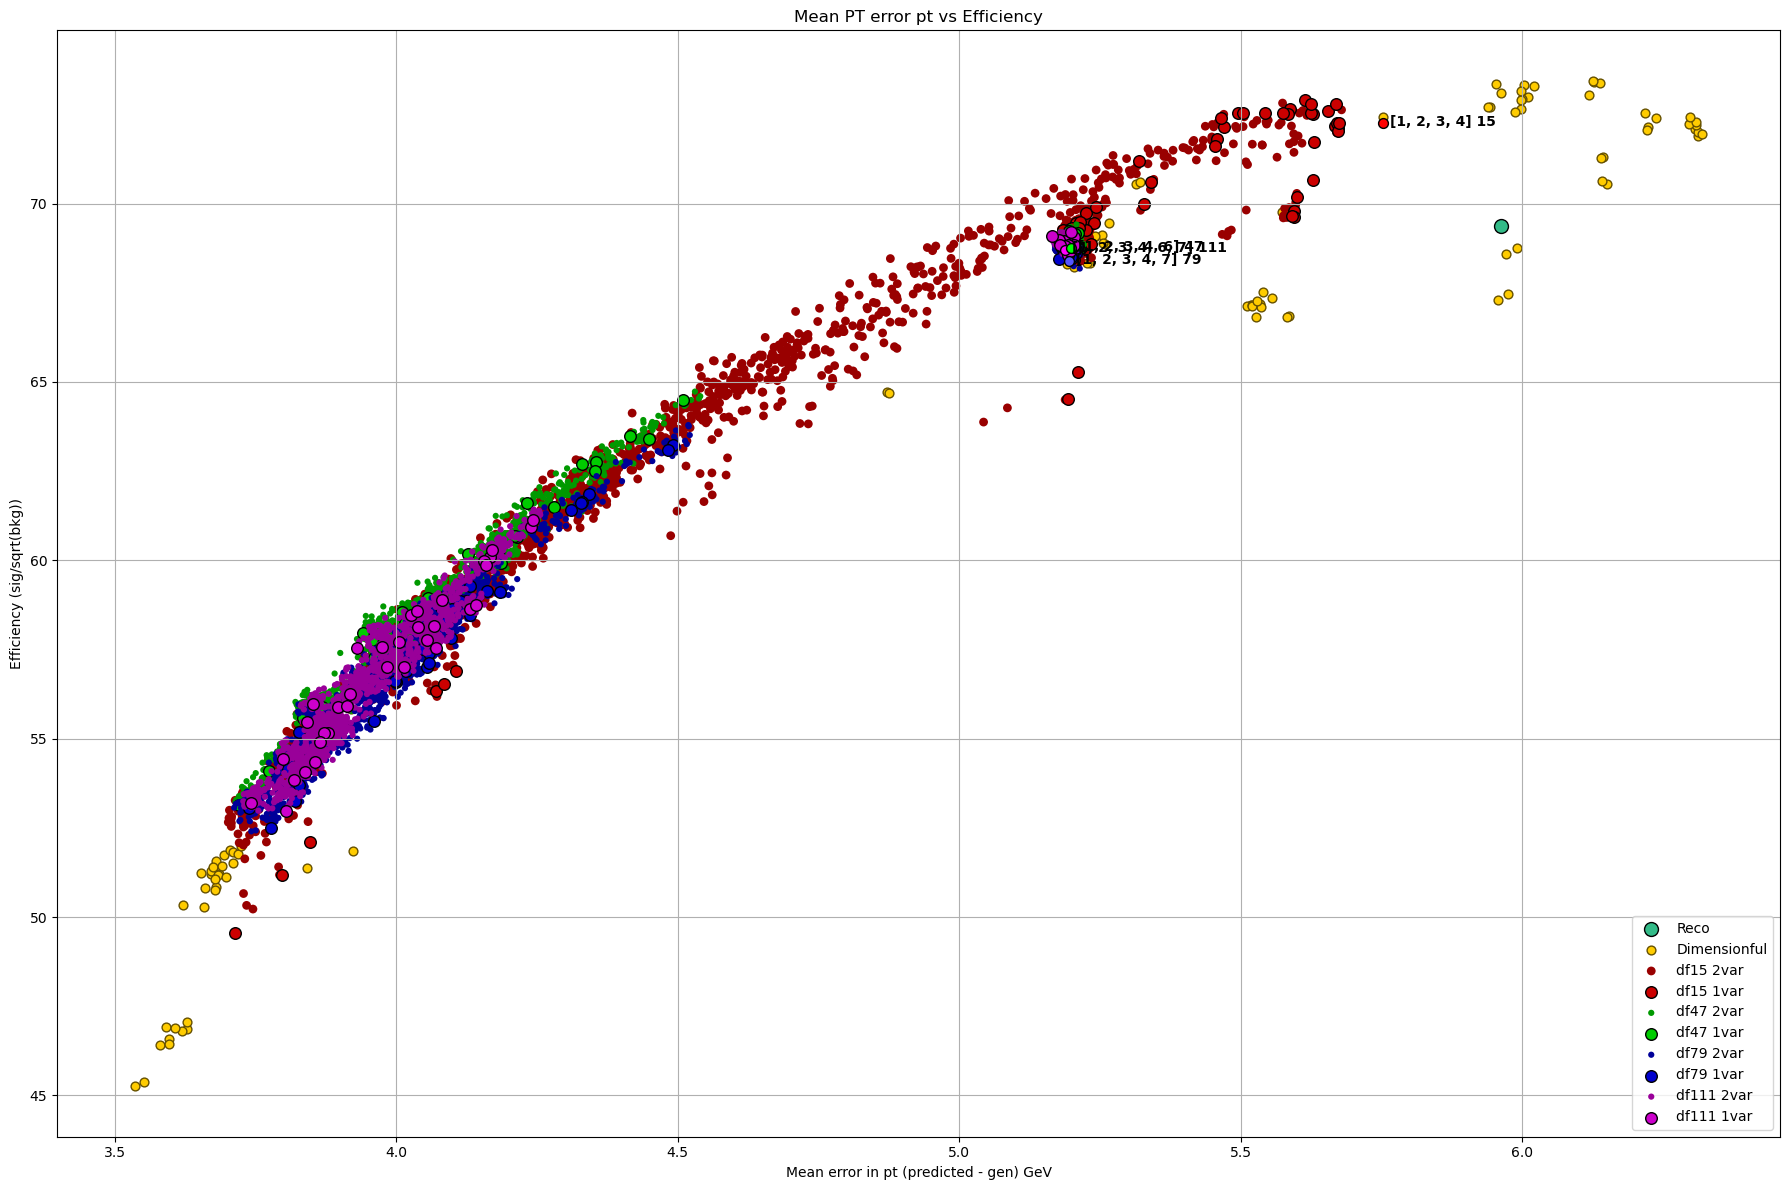

BDTG_df80_dl511 3.536478182120045 45.25145811583857


In [5]:
#%matplotlib widget
plt.figure(figsize=(18, 12))

plt.scatter(reco_errors, reco_shape, color="#33bb88", label='Reco', s=100, alpha=1.0, edgecolor="#000000")
plt.scatter(df_errors, df_shape, color="#ffcc00", label='Dimensionful', s=40, alpha=1.0, edgecolor="#665100")

#plt.scatter(df15_threevar_errors, df15_threevar_shape, color="#440000", label='df15 3var', s=15, alpha=1.0, edgecolor="none")
plt.scatter(df15_twovar_errors, df15_twovar_shape, color="#990000", label='df15 2var', s=40, alpha=1.0, edgecolor="none")
plt.scatter(df15_onevar_errors, df15_onevar_shape, color="#CC0000", label='df15 1var', s=70, alpha=1.0, edgecolor="#000000")

#plt.scatter(df47_threevar_errors, df47_threevar_shape, color="#006600", label='df47 3var', s=15, alpha=1.0, edgecolor="none")
plt.scatter(df47_twovar_errors, df47_twovar_shape, color="#009900", label='df47 2var', s=20, alpha=1.0, edgecolor="none")
plt.scatter(df47_onevar_errors, df47_onevar_shape, color="#00CC00", label='df47 1var', s=70, alpha=1.0, edgecolor="#000000")

plt.scatter(df79_twovar_errors, df79_twovar_shape, color="#000099", label='df79 2var', s=20, alpha=1.0, edgecolor="none")
plt.scatter(df79_onevar_errors, df79_onevar_shape, color="#0000CC", label='df79 1var', s=70, alpha=1.0, edgecolor="#000000")

plt.scatter(df111_twovar_errors, df111_twovar_shape, color="#990099", label='df111 2var', s=20, alpha=1.0, edgecolor="none")
plt.scatter(df111_onevar_errors, df111_onevar_shape, color="#CC00CC", label='df111 1var', s=70, alpha=1.0, edgecolor="#000000")



for label, e, s in zip(df_names, df_errors, df_shape):
    varsC = getVarsFromCode(int(label.split("_")[1].replace("df", "")))
    if ((label.split("_")[1] == "df15")):
        print(label.split("_")[1], getVarsFromCode(int(label.split("_")[1].replace("df", ""))), e, s)
        plt.annotate(str(getVarsFromCode(int(label.split("_")[1].replace("df", "")))) + " " + label.split("_")[1].replace("df", ""), (e, s), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
        plt.scatter(e, s, color="#ff0000", s=50, alpha=1.0, edgecolor="#000000")
    '''if (5 not in varsC) and not (6 in varsC and 7 in varsC):
        plt.annotate(str(getVarsFromCode(int(label.split("_")[1].replace("df", "")))) + " " + label.split("_")[1].replace("df", ""), (e, s), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
        plt.scatter(e, s, color="#ff00aa", s=50, alpha=1.0, edgecolor="#000000")
        print(label.split("_")[1], getVarsFromCode(int(label.split("_")[1].replace("df", ""))), e, s)'''

    if ((label.split("_")[1] == "df47")):
        print(label.split("_")[1], getVarsFromCode(int(label.split("_")[1].replace("df", ""))))
        plt.annotate(str(getVarsFromCode(int(label.split("_")[1].replace("df", "")))) + " " + label.split("_")[1].replace("df", ""), (e, s), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
        plt.scatter(e, s, color="#00FF00", s=50, alpha=1.0, edgecolor="#000000")
    if ((label.split("_")[1] == "df79")):
        print(label.split("_")[1], getVarsFromCode(int(label.split("_")[1].replace("df", ""))))
        plt.annotate(str(getVarsFromCode(int(label.split("_")[1].replace("df", "")))) + " " + label.split("_")[1].replace("df", ""), (e, s), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
        plt.scatter(e, s, color="#5555FF", s=50, alpha=1.0, edgecolor="#000000")
    if ((label.split("_")[1] == "df111")):
        print(label.split("_")[1], getVarsFromCode(int(label.split("_")[1].replace("df", ""))))
        plt.annotate(str(getVarsFromCode(int(label.split("_")[1].replace("df", "")))) + " " + label.split("_")[1].replace("df", ""), (e, s), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
        plt.scatter(e, s, color="#FF00FF", s=50, alpha=1.0, edgecolor="#000000")

bestOnes = {}
for n, e, s in zip(df15_twovar_names, df15_twovar_errors, df15_twovar_shape):
    inter = getInterval(e)
    if inter not in bestOnes:
        bestOnes[inter] = (n, e, s)
    else:
        if bestOnes[inter][2] < s:
            bestOnes[inter] = (n, e, s)

for key, value in bestOnes.items():
    print(key, value)
    #plt.annotate(value[0], (value[1], value[2]), textcoords="offset points", xytext=(-3,-2), ha='right', weight='bold')
    #plt.scatter(value[1], value[2], color="#5555FF", s=50, alpha=1.0, edgecolor="#000000")
    



plt.xlabel('Mean error in pt (predicted - gen) GeV')
plt.ylabel('Efficiency (sig/sqrt(bkg))')
plt.title('Mean PT error pt vs Efficiency')
xmin, xmax, xsep = 2.0, 6, 0.5
#xmin, xmax, xsep = 6.2, 6.35, 0.01
ymin, ymax, ysep = 120, 250, 10
#ymin, ymax, ysep = 172, 180, 1
#plt.xlim(xmin, xmax)
#plt.ylim(ymin, ymax)
#plt.yticks(np.arange(ymin, ymax+0.001, ysep))
#plt.xticks(np.arange(xmin, xmax+0.001, xsep))
plt.grid()
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
print(arrs[0][np.argmin(arrs[1])], arrs[1][np.argmin(arrs[1])], arrs[2][np.argmin(arrs[1])])

df111 [1, 2, 3, 4, 6, 7] 5.188338497685262 21.333307282886786
df15 [1, 2, 3, 4] 5.753381083633339 20.920973678560223
df47 [1, 2, 3, 4, 6] 5.199228913117939 21.255236203380527
df79 [1, 2, 3, 4, 7] 5.195556893569009 21.308032251691447
BDTG_df15_dl511_v0_v52 4.373657858236949 23.670638903562317
BDTG_df15_dl511_v15_v41 4.490839648893822 22.60613856223925
BDTG_df15_dl511_v0_v43 4.611127607790665 21.99313672031413
BDTG_df15_dl511_v7_v46 4.621496591667838 21.814384427602985


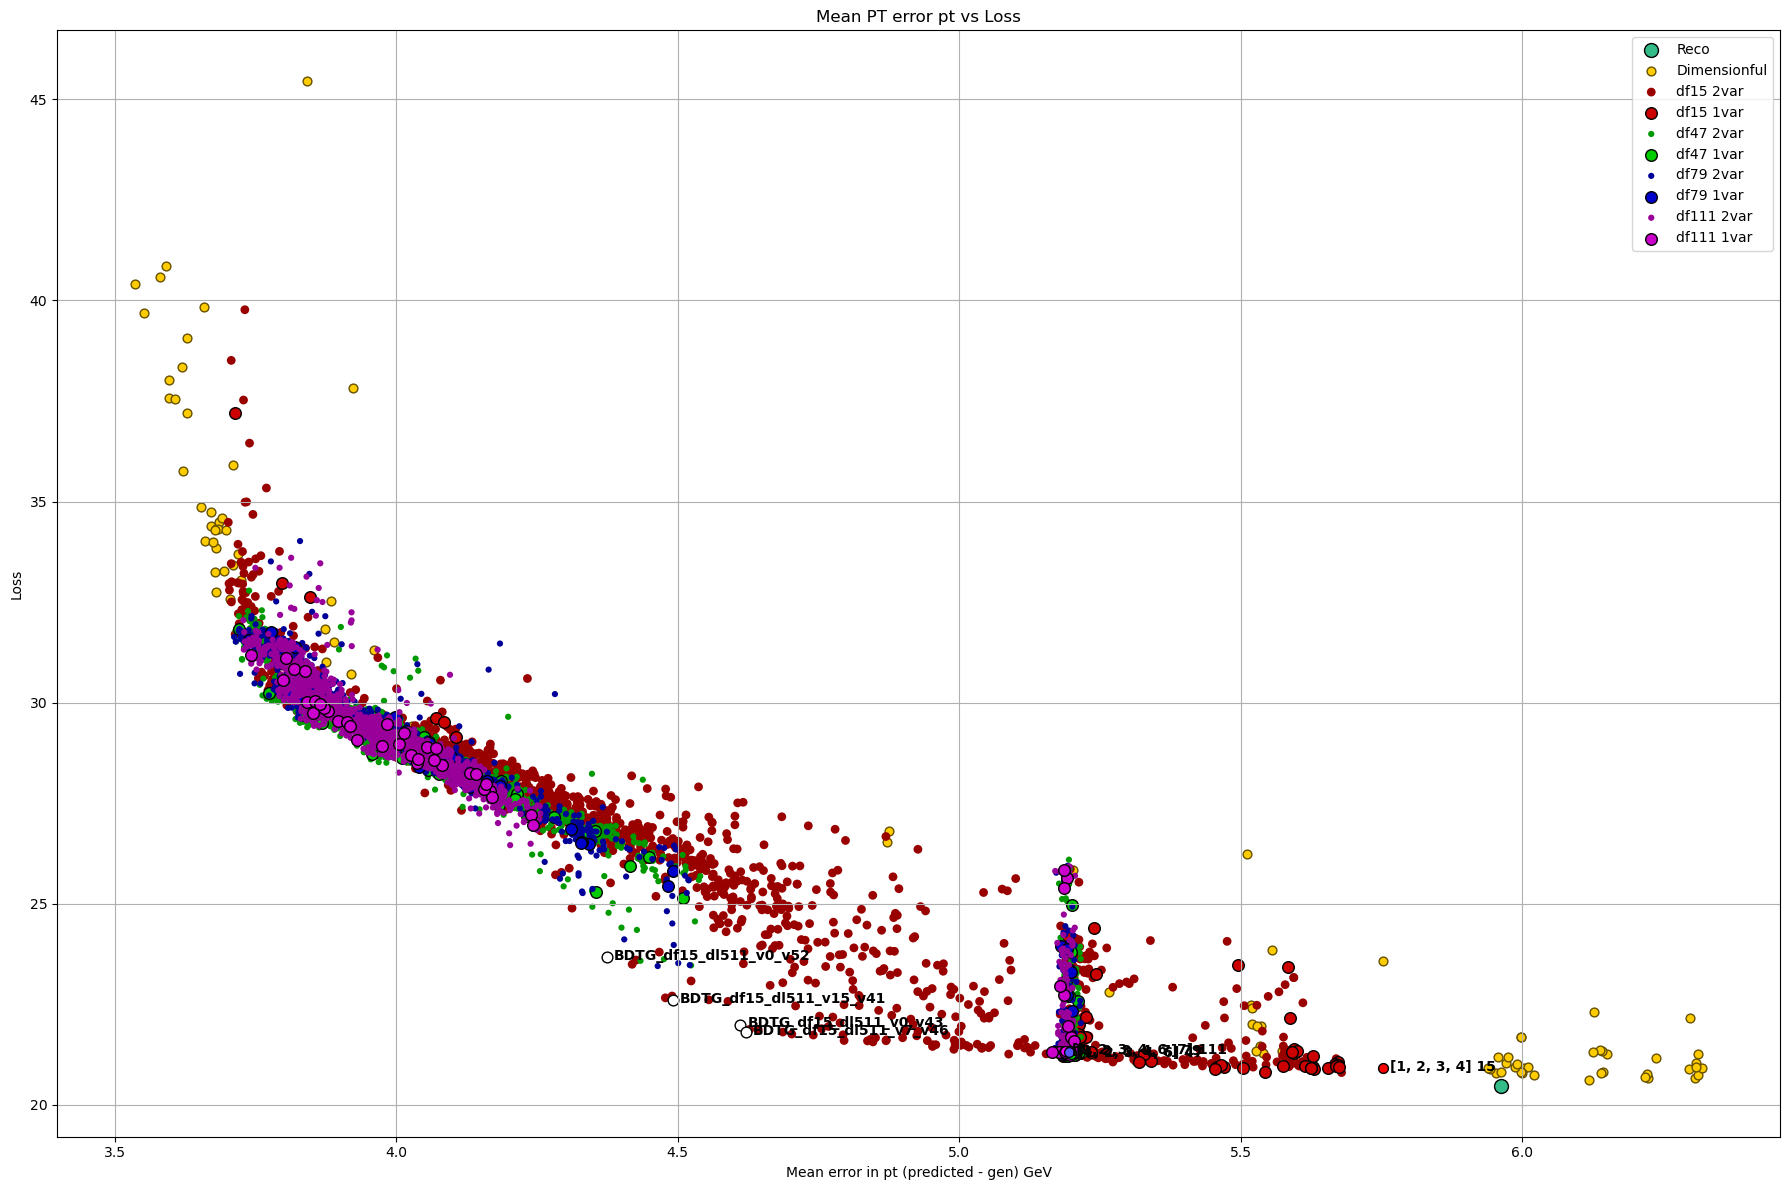

BDTG_df80_dl511 3.536478182120045 45.25145811583857 40.40517745958408


In [14]:
#FOR LOSS
plt.figure(figsize=(18, 12))

plt.scatter(reco_errors, reco_loss, color="#33bb88", label='Reco', s=100, alpha=1.0, edgecolor="#000000")
plt.scatter(df_errors, df_loss, color="#ffcc00", label='Dimensionful', s=40, alpha=1.0, edgecolor="#665100")

#plt.scatter(df15_threevar_errors, df15_threevar_loss, color="#440000", label='df15 3var', s=15, alpha=1.0, edgecolor="none")
plt.scatter(df15_twovar_errors, df15_twovar_loss, color="#990000", label='df15 2var', s=40, alpha=1.0, edgecolor="none")
plt.scatter(df15_onevar_errors, df15_onevar_loss, color="#CC0000", label='df15 1var', s=70, alpha=1.0, edgecolor="#000000")

#plt.scatter(df47_threevar_errors, df47_threevar_loss, color="#006600", label='df47 3var', s=15, alpha=1.0, edgecolor="none")
plt.scatter(df47_twovar_errors, df47_twovar_loss, color="#009900", label='df47 2var', s=20, alpha=1.0, edgecolor="none")
plt.scatter(df47_onevar_errors, df47_onevar_loss, color="#00CC00", label='df47 1var', s=70, alpha=1.0, edgecolor="#000000")

plt.scatter(df79_twovar_errors, df79_twovar_loss, color="#000099", label='df79 2var', s=20, alpha=1.0, edgecolor="none")
plt.scatter(df79_onevar_errors, df79_onevar_loss, color="#0000CC", label='df79 1var', s=70, alpha=1.0, edgecolor="#000000")

plt.scatter(df111_twovar_errors, df111_twovar_loss, color="#990099", label='df111 2var', s=20, alpha=1.0, edgecolor="none")
plt.scatter(df111_onevar_errors, df111_onevar_loss, color="#CC00CC", label='df111 1var', s=70, alpha=1.0, edgecolor="#000000")



for label, e, s in zip(df_names, df_errors, df_loss):
    if s < 26 and e < 5:
        print(label.split("_")[1], getVarsFromCode(int(label.split("_")[1].replace("df", ""))), e, s)
        plt.annotate(label, (e, s), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
        plt.scatter(e, s, color="#eeffff", s=50, alpha=1.0, edgecolor="#000000")
    varsC = getVarsFromCode(int(label.split("_")[1].replace("df", "")))
    if ((label.split("_")[1] == "df15")):
        print(label.split("_")[1], getVarsFromCode(int(label.split("_")[1].replace("df", ""))), e, s)
        plt.annotate(str(getVarsFromCode(int(label.split("_")[1].replace("df", "")))) + " " + label.split("_")[1].replace("df", ""), (e, s), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
        plt.scatter(e, s, color="#ff0000", s=50, alpha=1.0, edgecolor="#000000")
    '''if (5 not in varsC) :#and s < 25 and e < 5.18:
        #plt.annotate(str(getVarsFromCode(int(label.split("_")[1].replace("df", "")))) + " " + label.split("_")[1].replace("df", ""), (e, s), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
        plt.scatter(e, s, color="#ff00aa", s=50, alpha=1.0, edgecolor="#000000")
        print(label.split("_")[1], getVarsFromCode(int(label.split("_")[1].replace("df", ""))), e, s)'''
    if ((label.split("_")[1] == "df47")):
        print(label.split("_")[1], getVarsFromCode(int(label.split("_")[1].replace("df", ""))), e, s)
        plt.annotate(str(getVarsFromCode(int(label.split("_")[1].replace("df", "")))) + " " + label.split("_")[1].replace("df", ""), (e, s), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
        plt.scatter(e, s, color="#00FF00", s=50, alpha=1.0, edgecolor="#000000")
    if ((label.split("_")[1] == "df79")):
        print(label.split("_")[1], getVarsFromCode(int(label.split("_")[1].replace("df", ""))), e, s)
        plt.annotate(str(getVarsFromCode(int(label.split("_")[1].replace("df", "")))) + " " + label.split("_")[1].replace("df", ""), (e, s), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
        plt.scatter(e, s, color="#5555FF", s=50, alpha=1.0, edgecolor="#000000")
    if ((label.split("_")[1] == "df111")):
        print(label.split("_")[1], getVarsFromCode(int(label.split("_")[1].replace("df", ""))), e, s)
        plt.annotate(str(getVarsFromCode(int(label.split("_")[1].replace("df", "")))) + " " + label.split("_")[1].replace("df", ""), (e, s), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
        plt.scatter(e, s, color="#FF00FF", s=50, alpha=1.0, edgecolor="#000000")


mine_l, mine_e, mine_s = 0, 10, 0
minl_l, minl_e, minl_s = 0, 0, 200

for label, e, s in zip(names_filt, errors_filt, loss_filt):
    if s < 24 and e < 4.5:
        if e < mine_e:
            mine_l, mine_e, mine_s = label, e, s
        if s < minl_s:
            minl_l, minl_e, minl_s = label, e, s
print(mine_l, mine_e, mine_s)
plt.annotate(mine_l, (mine_e, mine_s), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
plt.scatter(mine_e, mine_s, color="#ffffff", s=60, alpha=1.0, edgecolor="#000000")
print(minl_l, minl_e, minl_s)
plt.annotate(minl_l, (minl_e, minl_s), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
plt.scatter(minl_e, minl_s, color="#ffffff", s=60, alpha=1.0, edgecolor="#000000")

mine_l, mine_e, mine_s = 0, 10, 0
minl_l, minl_e, minl_s = 0, 0, 200

for label, e, s in zip(names_filt, errors_filt, loss_filt):
    if s < 22 and e < 4.67:
        if e < mine_e:
            mine_l, mine_e, mine_s = label, e, s
        if s < minl_s:
            minl_l, minl_e, minl_s = label, e, s
print(mine_l, mine_e, mine_s)
plt.annotate(mine_l, (mine_e, mine_s), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
plt.scatter(mine_e, mine_s, color="#ffffff", s=60, alpha=1.0, edgecolor="#000000")
print(minl_l, minl_e, minl_s)
plt.annotate(minl_l, (minl_e, minl_s), textcoords="offset points", xytext=(5,-2), ha='left', weight='bold')
plt.scatter(minl_e, minl_s, color="#ffffff", s=60, alpha=1.0, edgecolor="#000000")


plt.xlabel('Mean error in pt (predicted - gen) GeV')
plt.ylabel('Loss')
plt.title('Mean PT error pt vs Loss')
xmin, xmax, xsep = 2.0, 6, 0.5
#xmin, xmax, xsep = 6.2, 6.35, 0.01
ymin, ymax, ysep = 120, 250, 10
#ymin, ymax, ysep = 172, 180, 1
#plt.xlim(xmin, xmax)
#plt.ylim(ymin, ymax)
#plt.yticks(np.arange(ymin, ymax+0.001, ysep))
#plt.xticks(np.arange(xmin, xmax+0.001, xsep))
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
print(arrs[0][np.argmin(arrs[1])], arrs[1][np.argmin(arrs[1])], arrs[2][np.argmin(arrs[1])], arrs[3][np.argmin(arrs[1])])

In [19]:
def getFullNameOfHistFile(mesonCat, cat, year, date, extraTitle=None, regModelName=None):
    """Generates the full file name for a histogram file based on the provided parameters."""
    fileName = "HCandMassHist_" + mesonCat[:-3] + "_" + cat[:-3] + "_" + str(year) + "_" + date + ".root"
    if extraTitle is not None:
        fileName = fileName[:-5] + "__" + extraTitle.replace(" ", "_").replace(",", "") + fileName[-5:]
    if regModelName is not None:
        fileName = fileName[:-5] + "__" + regModelName + fileName[-5:]
    return "/data/submit/pdmonte/outHistsFits/" + fileName


mesonCat = "Phi3Cat"
cat = "GFcat"
year = 2018
date = "AUG24"
regModelName = "BDTG_df15_dl511_v1_v35"

print(getFullNameOfHistFile(mesonCat, cat, year, date, extraTitle="None", regModelName=regModelName))

/data/submit/pdmonte/outHistsFits/HCandMassHist_Phi3_GF_2018_AUG24__None__BDTG_df15_dl511_v1_v35.root
